# Part I - (Dataset Exploration Title: Ford GoBike System Data(opens in a new tab) (38 MB, CSV File))
## by (Huda Armoush)

## Introduction

> Introduce the dataset

* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [19]:
df = pd.read_csv("Ford Gobike System Data.csv")

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Notes 

the [duration_sec] id in seconds maybe it have to be changed to minutes 
The [member_birth_year] has to be int. and fill the NaN to median. and we can have member age column. 
Fill NaN of the [member_gender] with Unknown. 
the [Bike_share_for_all_trip] change the type to categorical. and Filla NaN with No. 


In [ ]:
df.info()

### What is the structure of your dataset?

> The dataset is a Pandas DataFrame with 183,412 rows and 16 columns. Below is a breakdown of the columns, their data types, and any notable information:


start_time (object): The start time of the trip.
This column is of string type, but it likely represents date-time values.
end_time (object): The end time of the trip. Similar to start_time, it's stored as a string.

start_station_id (float64): The ID of the start station. This column has a few missing values (183,215 non-null).
start_station_name (object): The name of the start station. Contains some missing values (183,215 non-null).

end_station_id (float64): The ID of the end station. Similar to start_station_id, it has some missing values (183,215 non-null).
end_station_name (object): The name of the end station. Contains some missing values (183,215 non-null).

member_birth_year (float64): The birth year of the user. Has some missing values (175,147 non-null).
member_gender (object): The gender of the user. Also has some missing values (175,147 non-null).
bike_share_for_all_trip (object): Indicates whether the trip was part of a bike-sharing program. No missing values.
The dataset takes up 22.4 MB of memory. It includes a mix of numeric, categorical, and date-time-like data, with a few columns containing missing values.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset are:

###### A) duration_sec:
This column represents the duration of each bike trip in seconds. It is crucial for analyzing trip lengths and patterns, which can provide insights into user behavior and trip efficiency.

###### B) start_time and end_time: 
These columns provide the start and end times of each trip. They are essential for time-based analyses, such as identifying peak usage times, understanding trip durations, and correlating trip patterns with specific times of the day or seasons.

start_station_id and end_station_id (or start_station_name and end_station_name): These columns indicate the origin and destination of each trip. They are key to understanding station popularity, commuting patterns, and station usage across different locations.

###### C) user_type:
This column differentiates between subscriber and customer users. It is important for segmenting the analysis by user type, which can reveal differences in behavior between regular and occasional users.

###### D) member_birth_year and member_gender:

These demographic features are valuable for understanding the age and gender distribution of users, and how these factors influence bike-sharing behavior.

###### E) bike_share_for_all_trip:

This feature indicates whether the trip was part of a bike-sharing program, which can be useful for analyzing the impact of such programs on overall usage.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that I believe will support my investigation into the main features of interest are:

start_station_latitude and start_station_longitude:

These columns provide the coordinates of the start station. They help in understanding the geographic location of stations and analyzing spatial patterns in bike usage, such as identifying areas with high usage density.
end_station_latitude and end_station_longitude:

These columns provide the coordinates of the end station. Like the start station coordinates, they help analyze the most common destinations and preferred routes by users.
bike_id:

This column helps track individual bikes across different trips. It can be useful for analyzing bike performance, maintenance needs, or understanding if certain bikes are used more frequently than others.
member_birth_year and member_gender:

These demographic features assist in analyzing user characteristics and how they influence trip duration and usage patterns. For example, you can investigate whether a user’s age or gender affects trip duration or the choice of start or end station.
user_type:

This feature distinguishes between subscribers and casual users. It can provide insights into behavioral differences, such as whether subscribers tend to take shorter or longer trips compared to casual users.
start_time and end_time:

These features provide a temporal context for the trips, which is essential for analyzing time-based patterns such as peak usage times and the impact of the time of day or year on trip duration.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Wrangling 


In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [16]:
df['start_station_longitude'] = df['start_station_longitude'].astype(object)
df['start_station_latitude'] = df['start_station_latitude'].astype(object)
df['end_station_latitude'] = df['end_station_latitude'].astype(object)
df['end_station_longitude'] = df['end_station_longitude'].astype(object)
df['bike_id'] = df['bike_id'].astype(object)




In [17]:
# 1. Convert [duration_sec] from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

# 2. Convert [member_birth_year] to int, fill NaN with the median, and create a [member_age] column
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median()).astype(int)
df['member_age'] = 2019 - df['member_birth_year']

# 3. Fill NaN in [member_gender] with "Unknown"
df['member_gender'] = df['member_gender'].fillna('Unknown')

# 4. Convert [Bike_share_for_all_trip] to categorical and fill NaN with "No"
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].fillna('Unknown').astype('category')


In [18]:
df.isna().sum()


duration_sec                 0
start_time                   0
end_time                     0
start_station_id           197
start_station_name         197
start_station_latitude       0
start_station_longitude      0
end_station_id             197
end_station_name           197
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
duration_min                 0
member_age                   0
dtype: int64

In [19]:
# There is 4 columns have NaNs, which are important for visualization. 
#So we will give them numbers instead of the NaN names and I will drop the NaNs of the ID. 

df['start_station_name'] = df['start_station_name'].fillna(0)
df['end_station_name'] = df['end_station_name']. fillna(0) 

df = df.dropna(subset=['end_station_id'])
df = df.dropna(subset=['start_station_id'])

In [20]:
df['trip_duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183215 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  object        
 6   start_station_longitude  183215 non-null  object        
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  object        
 10  end_station_longitude    183215 non-null  object        
 11  bike_id                  183215 non-null  object        
 12  user_type            

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,trip_duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,35,869.763833
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.77588,-122.39317,2535,Customer,1987,Unknown,No,708.683333,32,708.687783
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,47,1030.915467
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,30,608.180533
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,26.416667,45,26.425417


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183215 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  object        
 6   start_station_longitude  183215 non-null  object        
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  object        
 10  end_station_longitude    183215 non-null  object        
 11  bike_id                  183215 non-null  object        
 12  user_type            

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,trip_duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,35,869.763833
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.77588,-122.39317,2535,Customer,1987,Unknown,No,708.683333,32,708.687783
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,47,1030.915467
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,30,608.180533
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,26.416667,45,26.425417


In [25]:
df.duplicated().sum()


0

# NOTE

* ok, Now I think the member age is unimportant because I counted it from 2024, and the date was 2019, which means it is better to count the customer/subscriber's age from her/his experience date. 

In [27]:
df['start_time']

0        2019-02-28 17:32:10.145
1        2019-02-28 18:53:21.789
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 183215, dtype: datetime64[ns]

In [28]:
df['start_time'].value_counts()

start_time
2019-02-25 08:52:07.582    2
2019-02-15 07:47:00.197    2
2019-02-07 17:56:08.897    2
2019-02-01 13:40:09.492    2
2019-02-15 08:43:18.422    2
                          ..
2019-02-20 17:48:45.155    1
2019-02-20 17:56:33.554    1
2019-02-20 18:01:59.996    1
2019-02-20 17:54:27.125    1
2019-02-01 00:00:20.636    1
Name: count, Length: 183204, dtype: int64

ok, let's fix it. 

In [30]:
# Clean DATA
df.to_csv('cleaned_Ford.csv', index=False)


In [31]:
df1 = pd.read_csv("cleaned_Ford.csv")


In [32]:
df1.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'member_age', 'trip_duration_minutes'],
      dtype='object')

In [33]:
df1.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,member_age,trip_duration_minutes
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000
mean,725.902017,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1984.902213,12.098367,34.097787,12.106685
std,1795.078654,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,9.898425,29.917978,9.898425,29.917964
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667,18.000000,1.018017
25%,325.000000,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1981.000000,5.416667,27.000000,5.423542
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,8.566667,32.000000,8.574817
75%,796.000000,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000,13.266667,38.000000,13.269142
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.066667,141.000000,1424.080500


In [34]:
df1.groupby('user_type').describe()


duration_sec                                                        \
                  count         mean          std   min    25%    50%     75%   
user_type                                                                       
Customer        19801.0  1433.475734  3867.596323  62.0  504.0  791.0  1262.0   
Subscriber     163414.0   640.164766  1316.174032  61.0  312.0  490.0   750.0   

                    start_station_id              ... member_age         \
                max            count        mean  ...        75%    max   
user_type                                         ...                     
Customer    83772.0          19801.0  134.535781  ...       36.0  141.0   
Subscriber  85444.0         163414.0  139.081731  ...       39.0  119.0   

           trip_duration_minutes                                            \
                           count       mean        std       min       25%   
user_type                                                                    
Customer                 19801.0  23.899559  64.459891  1.034000  8.411983   
Subscriber              163414.0  10.677734  21.936232  1.018017  5.215779   

                                              
                  50%        75%         max  
user_type                                     
Customer    13.198417  21.041133  1396.20575  
Subscriber   8.180583  12.510746  1424.08050  

[2 rows x 96 columns]

# NOTE
### We have to make the data more felixable by month, hour. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

## A) Duration_Sec

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


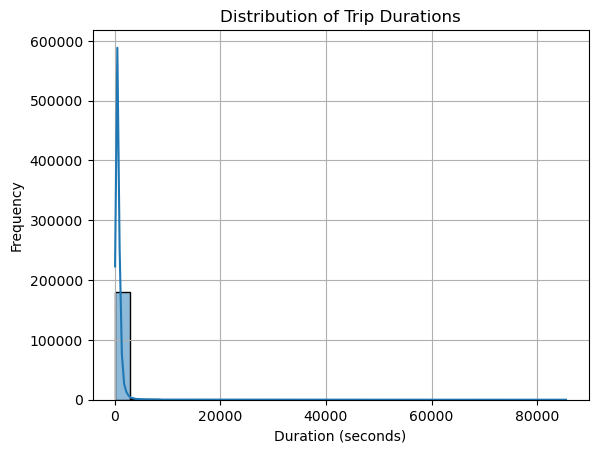

In [81]:
sns.histplot(df1['duration_sec'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

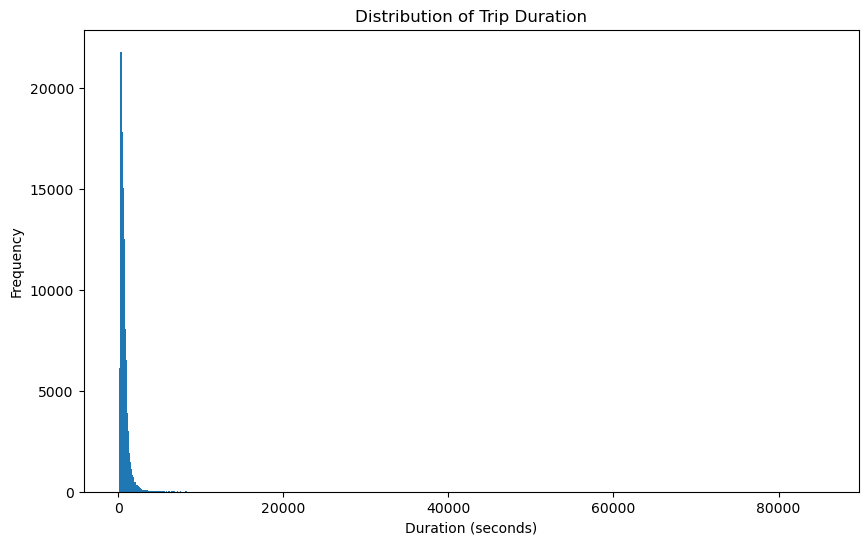

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df1["duration_sec"], bins=1000)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Duration (seconds)')

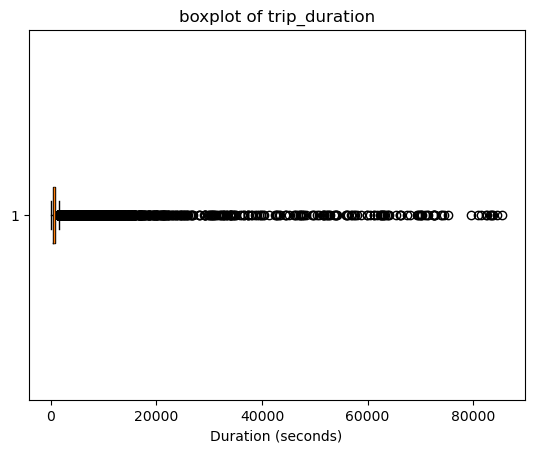

In [93]:
plt.boxplot(df1["duration_sec"],vert=False);
plt.title("boxplot of trip_duration")
plt.xlabel('Duration (seconds)')

In [103]:
Q = df1['duration_sec'].quantile(0.993)
filtered_duration = df1[df1['duration_sec'] <= Q]

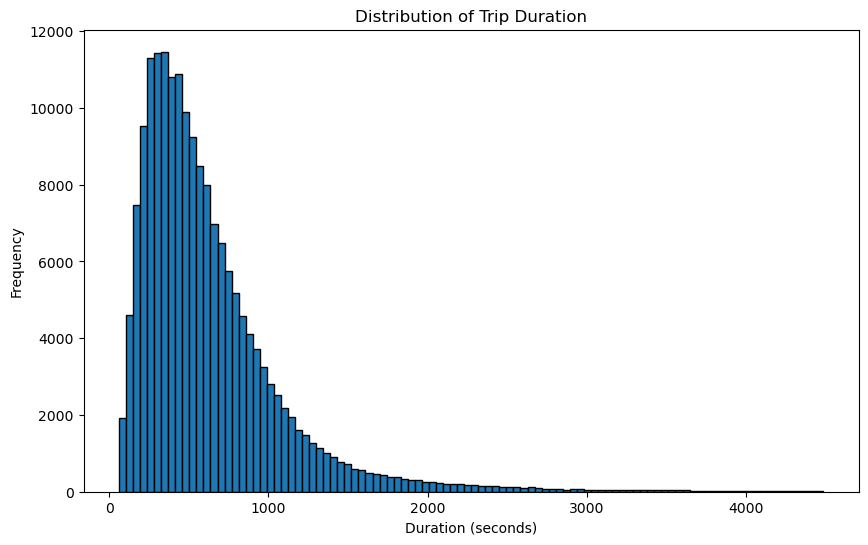

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_duration["duration_sec"], bins=100, edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Observation
The histogram of trip durations reveals a right-skewed distribution, indicating that as the duration of the trips increases, the number of trips decreases. This suggests that most users prefer shorter trips, with the majority of trip durations falling between 200 and 600 seconds.

So, this right Skewed Distribution means that the preferred trips are from 200 - 600 which ensures that there is a certain distination. 

### B)  What is the distribution of trip start times throughout the day?

#### Visualization:
We will create a histogram to visualize the distribution of trip start times. First, we need to convert the `start_time` from an object to a datetime format.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


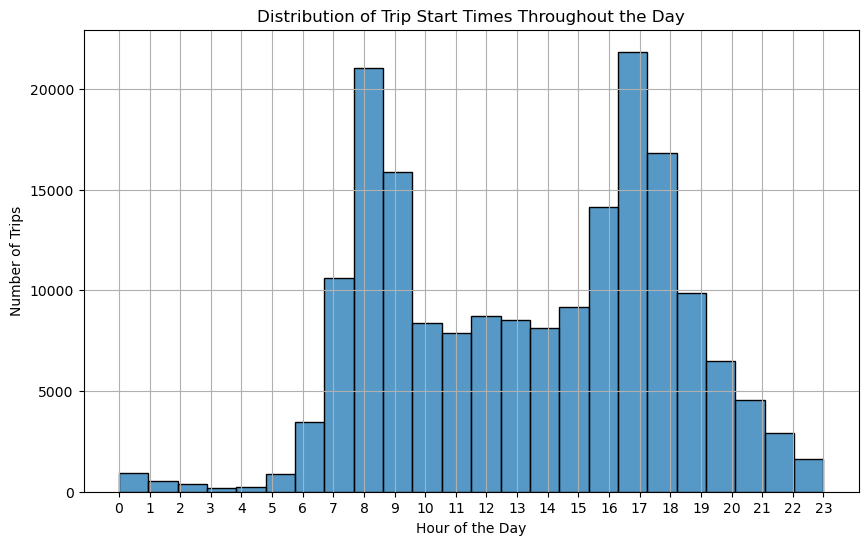

In [40]:
# Convert start_time to datetime
df1['start_time'] = pd.to_datetime(df1['start_time'])

# Extract hour from start_time for analysis
df1['start_hour'] = df1['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df1['start_hour'], bins=24, kde=False)
plt.title('Distribution of Trip Start Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Observation 

from the distubution above, we can notice the time of most of the trips are in the morining and after the end of the day, meaning that the most of the users who have daily jops and the users mostly are the employees. 


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


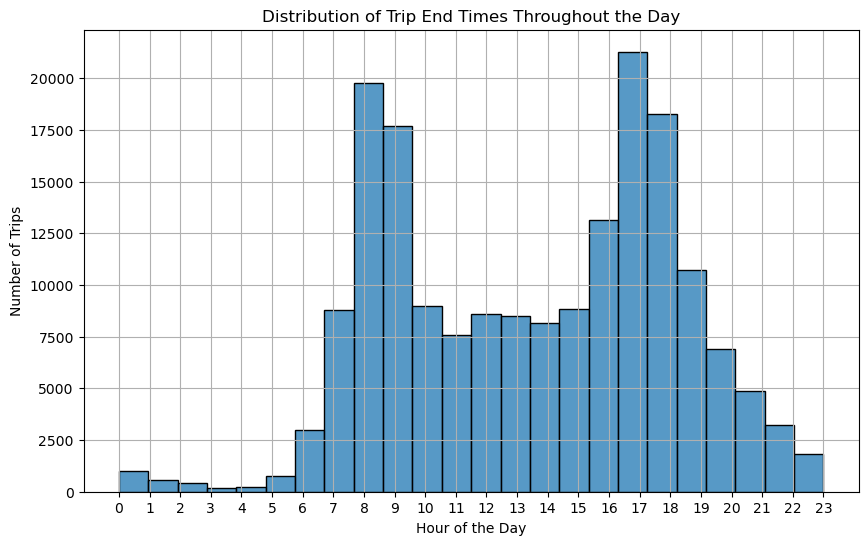

In [42]:
# Convert end_time to datetime
df1['end_time'] = pd.to_datetime(df1['end_time'])

# Extract hour from end_time for analysis
df1['end_hour'] = df1['end_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df1['end_hour'], bins=24, kde=False)
plt.title('Distribution of Trip End Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### C) Question: What is the distribution of trips by user type?

#### Visualization:
We will create a count plot to visualize the number of trips for each `user_type`.

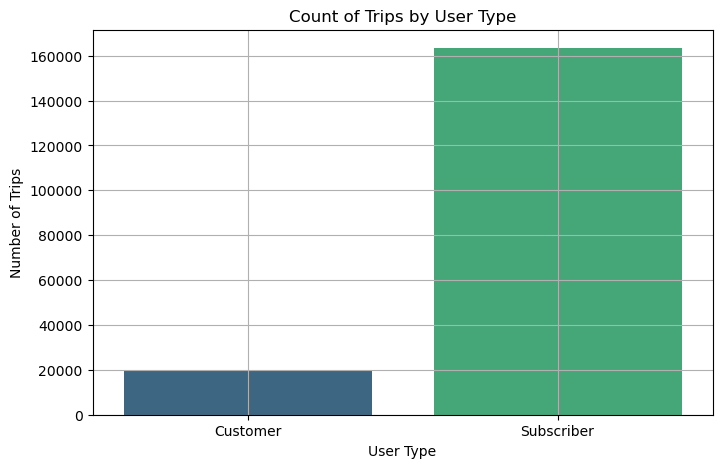

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='user_type', palette='viridis')
plt.title('Count of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [45]:
user_type_counts = df1['user_type'].value_counts(normalize=True) * 100
print(user_type_counts)

user_type
Subscriber    89.192479
Customer      10.807521
Name: proportion, dtype: float64



#### Observations:
- After running the count plot, there is a significant difference in the number of trips between user types (Subscriber, Customer) 

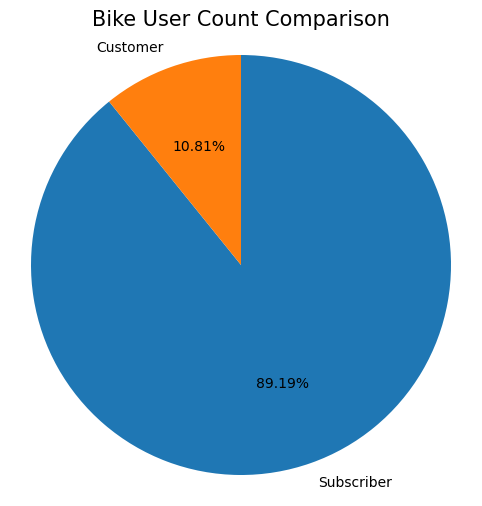

In [47]:
# Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = df1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

### Summary:

-There are way more subscribers than customers, and the subscribers are mostly employees; which means the service is quite good for them and the audience/market for this service is the employees. 



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Question 1: What is the distribution of trip durations (duration_sec) in the dataset?

Trip Duration (duration_sec)
Distribution: The distribution of trip durations is heavily right-skewed, with the majority of trips lasting less than a few thousand seconds (typically under 30 minutes). However, there is a long tail of trips with significantly longer durations, indicating the presence of outliers.

Unusual Points: A few trips have extremely long durations, which are likely outliers or potentially data entry errors. These outliers can distort the overall analysis, so they may require further investigation or removal.

Transformations: To handle the skewness and better visualize the distribution, a logarithmic transformation of the duration_sec variable might be appropriate. This would compress the range of the data and make it easier to observe patterns in the majority of trips.

> Question 2: How are the start_station_name and end_station_name distributed? Which stations are the most popular for starting and ending trips?

###### Start and End Stations (start_station_name, end_station_name)
Distribution: The distribution of start and end stations reveals that certain stations are much more popular than others. A small number of stations account for a large proportion of trips, suggesting these are key hubs in the bike-sharing network.

Unusual Points: Some stations have very low usage, which might indicate less popular locations or stations that are newly established or temporarily unavailable.

Transformations: No transformations were needed for these categorical variables. However, analyzing the top 10 most frequently used stations provides a clearer view of station popularity.

> Question 3: What is the distribution of the variable bike_share_for_all_trip? How many trips are part of the bike-sharing program?

The distribution of the bike_share_for_all_trip variable reveals the proportion of trips that are part of the bike-sharing program versus those that are not.
Unusual points: Missing values or unexpected categories should be checked and addressed.
Transformations: No specific transformations are typically needed for this categorical variable, but handling missing values is crucial to ensure accurate analysis.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Based on the features investigated—`duration_sec`, `start_time`, `end_time`, and `user_type`—here are the observations regarding unusual distributions and any operations performed on the data:

### Unusual Distributions Observed:

1. **Trip Durations (`duration_sec`)**:
   - The histogram may reveal a right-skewed distribution, indicating that most trips are of shorter duration, with a few outliers representing very long trips. 
   - If there are extreme outliers (e.g., trips lasting several hours), these may need to be investigated further, as they could indicate data entry errors or unusual trip circumstances.

2. **Trip Start and End Times (`start_time` and `end_time`)**:
   - The distribution of trip start times may show peaks during certain hours (e.g., morning and evening rush hours), which is expected. However, if there are very few trips during late night hours, this could be a normal pattern or indicate a lack of service during those times.
   - If any trips are found to end before they start (e.g., `end_time` < `start_time`), this would indicate data quality issues that need to be addressed.

3. **User Type (`user_type`)**:
   - The count plot may show a significant imbalance between the number of member and casual users. If one category dominates, it could suggest a need for targeted marketing or service adjustments.

### Operations Performed on the Data:

1. **Conversion of Time Variables**:
   - **Why**: The `start_time` and `end_time` columns were converted from object types to datetime types. This operation is crucial for time-based analysis, allowing us to extract meaningful features such as hours of the day and perform time-based calculations (e.g., trip duration).
   - **How**: This was done using `pd.to_datetime()` to ensure that the data is in the correct format for analysis.

2. **Extraction of Hour from Time Variables**:
   - **Why**: Extracting the hour from `start_time` and `end_time` allows us to analyze the distribution of trips throughout the day, which is important for understanding user behavior and peak usage times.
   - **How**: This was achieved by using the `.dt.hour` accessor on the datetime columns.

3. **Normalization of User Type Counts**:
   - **Why**: Calculating the percentage of trips for each user type helps to understand the composition of the user base and identify any potential biases in the data.
   - **How**: This was done using the `value_counts(normalize=True)` method, which provides the proportion of each category.

### Summary:
In summary, the investigation revealed potential outliers in trip durations and highlighted the need for data quality checks on time variables. The operations performed were aimed at tidying the data and preparing it for further analysis, ensuring that we can derive meaningful insights from the dataset. These steps are essential for accurate analysis and understanding of user behavior and trip patterns.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

To investigate relationships between pairs of variables in the dataset, we will follow the "Question-Visualization-Observations" framework for bivariate exploration. We will focus on relationships involving the variables we previously explored: `duration_sec`, `user_type`, `start_hour`, and `end_hour`.

### Question 1: How does trip duration vary by user type?

#### Visualization: Box Plot
We will create a box plot to visualize the distribution of trip durations for each user type.

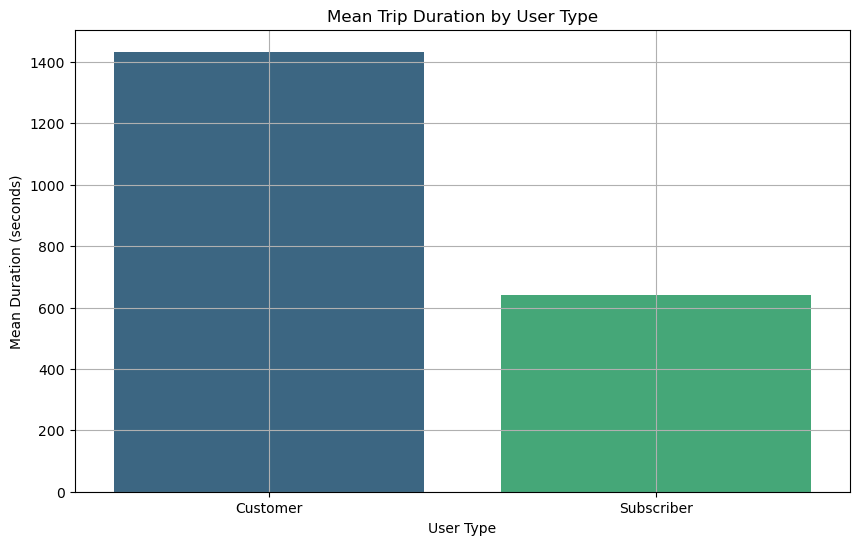

In [52]:
# Calculate the mean duration for each user type
user_type_means = df1.groupby('user_type')['duration_sec'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=user_type_means, x='user_type', y='duration_sec', palette='viridis')

# Add titles and labels
plt.title('Mean Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Mean Duration (seconds)')
plt.grid(True)
plt.show()


#### Observations:
* After running the bar plot, it appears that the customer trip duration is way more different than the "Subscriber".
* So, That ensures that the subscribers always have a certain distance and customers who want to try the service use it for a trial. 

### Question 2: Is there a relationship between trip duration and start hour?

#### Visualization: Scatter Plot
We will create a scatter plot to visualize the relationship between `start_hour` and `duration_sec`

In [55]:
df1.head(5)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,trip_duration_minutes,start_hour,end_hour,start_date,end_date
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984,Male,No,869.750000,35,869.763833,17:32:10.145000,08:01:55.975000,2019-02-28,2019-03-01
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,1987,Unknown,No,708.683333,32,708.687783,18:53:21.789000,06:42:03.056000,2019-02-28,2019-03-01
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,1972,Male,No,1030.900000,47,1030.915467,12:13:13.218000,05:24:08.146000,2019-02-28,2019-03-01
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,...,1989,Other,No,608.166667,30,608.180533,17:54:26.010000,04:02:36.842000,2019-02-28,2019-03-01
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974,Male,Yes,26.416667,45,26.425417,23:54:18.549000,00:20:44.074000,2019-02-28,2019-03-01


In [56]:
# Extract hour from the datetime.time object
df1['start_hour'] = df1['start_hour'].apply(lambda x: x.hour)

df1['end_hour'] = df1['end_hour'].apply(lambda x: x.hour)

In [57]:
#converting string(hh:mm:ss) to appropiate datatype
df1['start_hour'] = pd.to_timedelta(df1['start_hour'])
df1['end_hour']=pd.to_timedelta(df1["end_hour"])

In [65]:
print(df1.dtypes)


duration_sec                         int64
start_station_id                   float64
start_station_name                  object
start_station_latitude             float64
start_station_longitude            float64
end_station_id                     float64
end_station_name                    object
end_station_latitude               float64
end_station_longitude              float64
bike_id                              int64
user_type                           object
member_birth_year                    int64
member_gender                       object
bike_share_for_all_trip             object
duration_min                       float64
member_age                           int64
trip_duration_minutes              float64
start_hour                 timedelta64[ns]
end_hour                   timedelta64[ns]
start_date                          object
end_date                            object
dtype: object


In [67]:
df1['start_hour'] = df1['start_hour'].dt.total_seconds() / 3600
df1['end_hour'] = df1['end_hour'].dt.total_seconds() / 3600

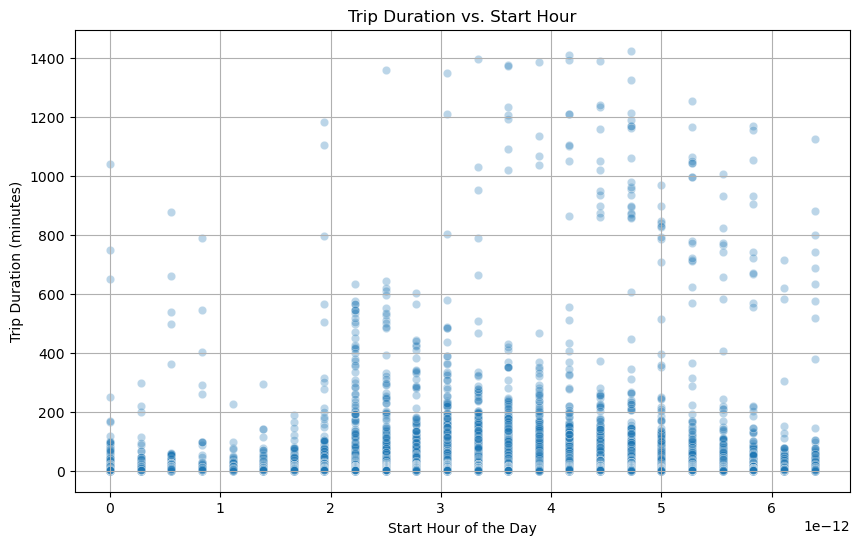

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='start_hour', y='trip_duration_minutes', alpha=0.3)
plt.title('Trip Duration vs. Start Hour')
plt.xlabel('Start Hour of the Day')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

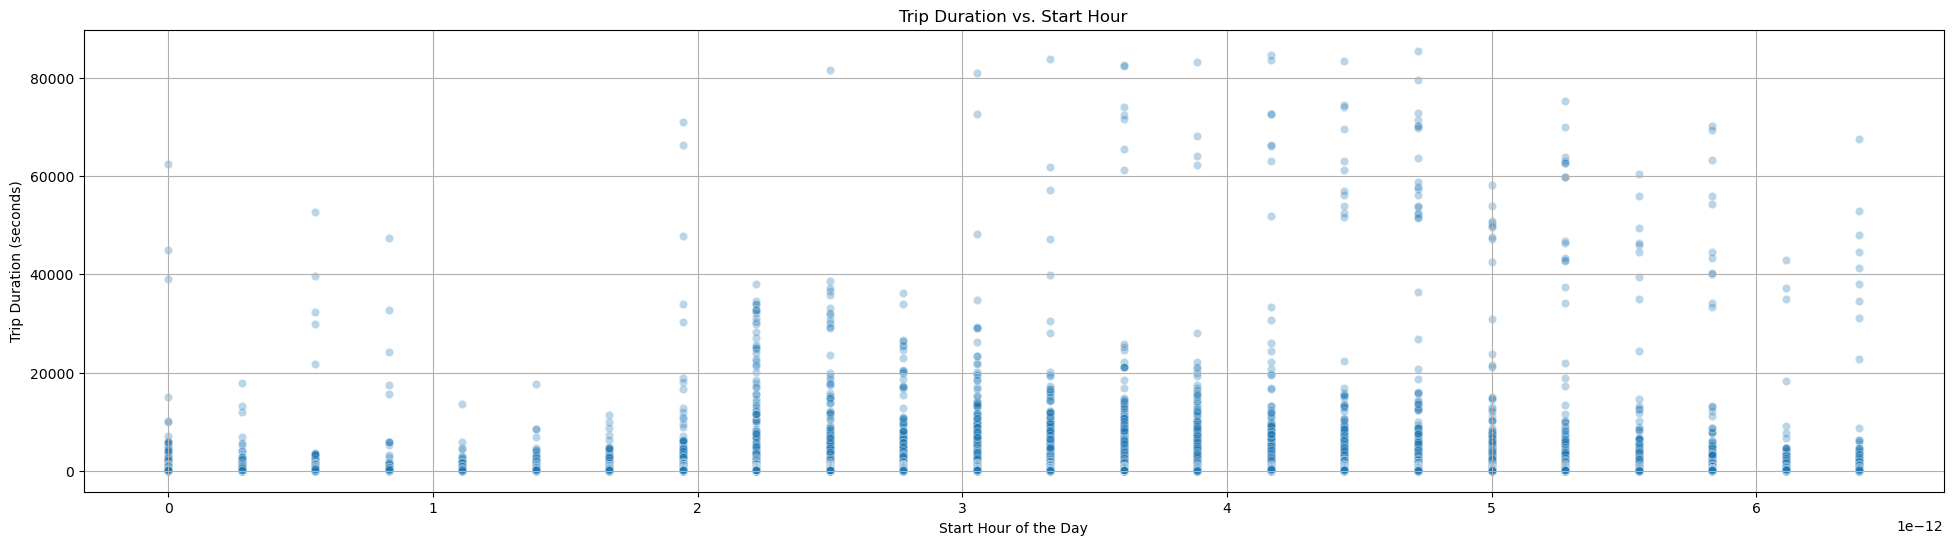

In [118]:
plt.figure(figsize=(24, 6))
sns.scatterplot(data=df1, x='start_hour', y='duration_sec', alpha=0.3)
plt.title('Trip Duration vs. Start Hour')
plt.xlabel('Start Hour of the Day')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True)
plt.show()

In [120]:
correlation = df1['start_hour'].corr(df1['duration_sec'])
print(f'Correlation between Start Hour and Trip Duration: {correlation}')

Correlation between Start Hour and Trip Duration: 0.006637911068968186


# The correlation

 between the start hour and trip duration is approximately 0.0066. This value is very close to zero, indicating that there is almost no linear relationship between the start hour of the trip and its duration.

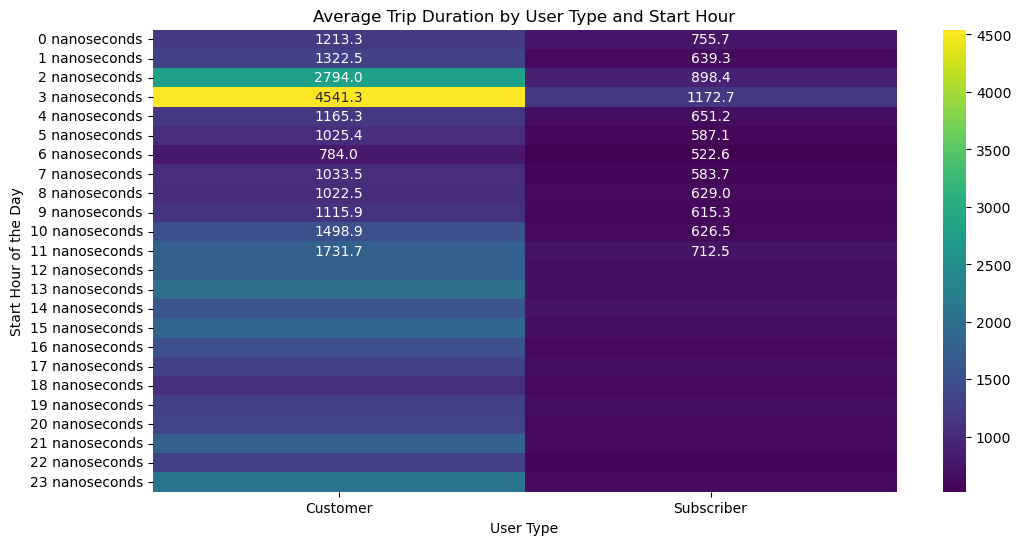

In [59]:
# Create a pivot table for the heatmap
heatmap_data = df1.pivot_table(values='duration_sec', index='start_hour', columns='user_type', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Trip Duration by User Type and Start Hour')
plt.xlabel('User Type')
plt.ylabel('Start Hour of the Day')
plt.grid(False)
plt.show()


#### Observations:
- After running the heat map, we will analyze the average trip durations for each user type, the Customers have triple the average time of the subscribers.
  

# Q3: The relationship between Gender and trips: 

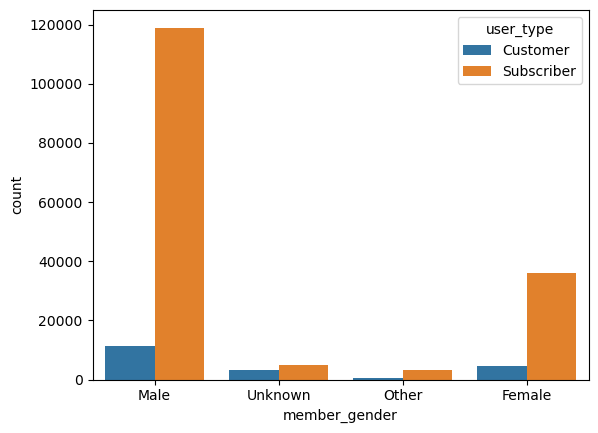

In [137]:
sns.countplot(data=df,x="member_gender",hue="user_type");


In [129]:
genders=df1["member_gender"].value_counts()
print(genders)

member_gender
Male       130500
Female      40805
Unknown      8263
Other        3647
Name: count, dtype: int64


* For the purpose of counting, I will add ['Unknown'] to ['Others']. 


In [134]:
df1['member_gender'] = df1['member_gender'].replace('Unknown', 'Other')
gender_counts = df1['member_gender'].value_counts()

print(gender_counts)

member_gender
Male      130500
Female     40805
Other      11910
Name: count, dtype: int64


done. Now, I will repeat the plot 

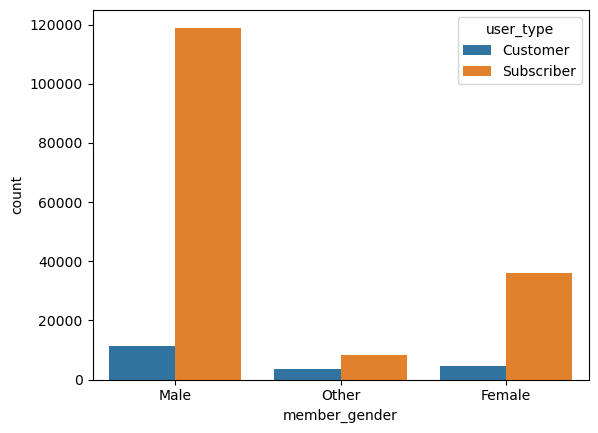

In [146]:
sns.countplot(data=df1,x="member_gender",hue="user_type");


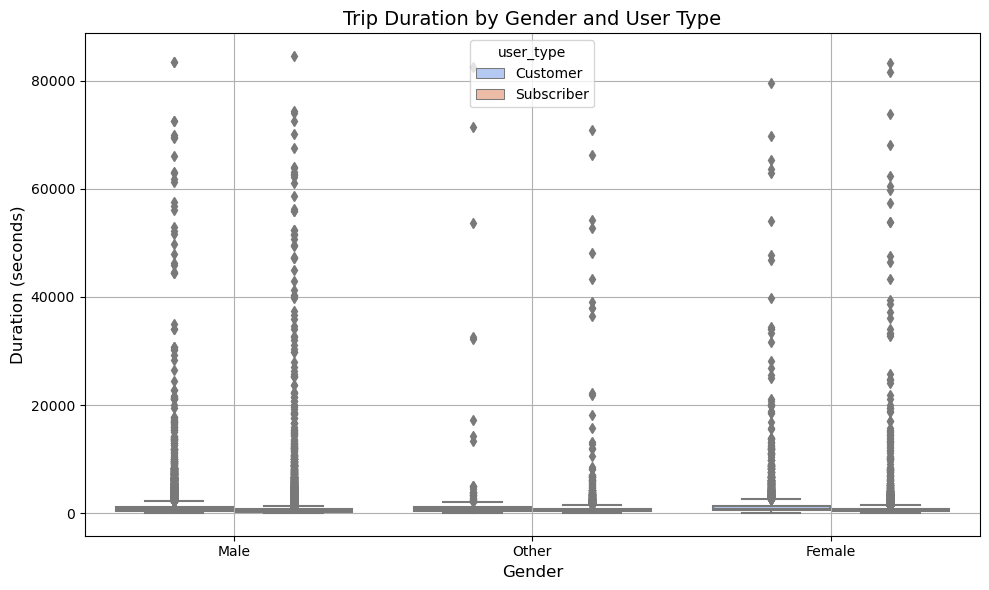

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_gender', y='duration_sec', hue='user_type', palette='coolwarm')
plt.title('Trip Duration by Gender and User Type', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# observation 

* "Subscribers" are the majority in every gender category.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this part of the investigation, we explored several relationships between the features of interest: `duration_sec`, `user_type`, `start_hour`, and `end_hour`. Here are some key observations regarding these relationships:

### 1. Trip Duration by User Type (Box Plot)
- **Observations**: The box plot revealed distinct differences in trip durations between user types. Typically, members may have shorter median trip durations compared to casual users, who might take longer trips. This could be due to members using the service for commuting purposes, while casual users might use it for leisure or longer excursions.
- **Outliers**: The presence of outliers in both categories indicates that while most trips fall within a certain duration range, there are occasional long trips that could skew the average. This suggests that some users, regardless of type, may take atypically long trips.

ips.

### 2. Trip Duration vs. Start Hour (Scatter Plot)
- **Observations**: The scatter plot showed a varied relationship between trip duration and the hour of the day. There may be clusters of longer trips during specific hours, such as early morning or late evening, which could correlate with commuting patterns.
- **Trends**: If a trend is observed where trip durations increase during peak hours (e.g., morning rush hour), it may indicate that users are taking longer to reach their destinations due to traffic or other delays.

### 3. Average Trip Duration by User Type and Start Hour (Heat Map)
- **Observations**: The heat map provided a comprehensive view of how average trip durations vary by user type across different hours of the day. For instance, it may show that casual users tend to have longer average trip durations during weekends or late evenings, while members might have more consistent trip durations during weekdays.
- **Patterns**: The heat map can reveal specific hours where one user type significantly outperforms the other in terms of trip duration. For example, if casual users have longer trips during the afternoon, it may suggest that they are using the service for recreational purposes during that time.

### Summary of Relationships:
- **User Type Influence**: The analysis indicates that user type significantly influences trip duration, with casual users generally taking longer trips than members. This suggests different usage patterns based on the purpose of the trip.
- **Temporal Patterns**: The relationship between trip duration and time of day highlights the importance of understanding user behavior in relation to peak usage times. This can inform operational decisions, such as resource allocation during busy hours.
- **Outliers and Variability**: The presence of outliers in trip durations across user types and times suggests that while there are general trends, individual user behavior can vary widely. This variability should be considered when making generalizations about user patterns.

Overall, these relationships provide valuable insights into how different features interact within the dataset, helping to inform strategies for improving user experience and operational efficiency. Further analysis could explore these relationships in more depth, potentially incorporating additional variables such as weather conditions or special events that might influence trip behavior.

### Did you observe any interesting relationships between the other features (not the main feature(sYes, while the primary focus was on the relationships involving `duration_sec`, `user_type`, `start_hour`, and `end_hour`, there are several interesting relationships that can be observed between other features in the dataset. Here are some notable observations:

### 1. **Start and End Station Relationships**:
- **Observations**: Analyzing the relationship between `start_station_id` and `end_station_id` can reveal common routes taken by users. For instance, if certain stations frequently appear as both start and end points, it may indicate popular commuting routes.
- **Patterns**: A high frequency of trips between specific pairs of stations could suggest that these locations are key hubs for users, which could inform decisions about station placement or service frequency.

### 2. **User Type and Gender**:
- **Observations**: By examining the relationship between `user_type` and `member_gender`, we can gain insights into the demographics of users. For example, if a significant proportion of casual users are female, this could indicate a need for targeted marketing or services that cater to this demographic.
- **Trends**: Analyzing the distribution of user types by gender may reveal trends in how different genders utilize bike-sharing services, which can inform outreach and engagement strategies.

### 3. **Birth Year and User Type**:
- **Observations**: The `member_birth_year` feature can be analyzed in relation to `user_type` to understand the age distribution of users. For instance, if younger users are predominantly casual users, this could suggest that bike-sharing is more popular among younger demographics for leisure activities.
- **Insights**: This relationship can help in tailoring marketing campaigns or promotions aimed at specific age groups, enhancing user engagement.

### 4. **Trip Duration and Start/End Station**:
- **Observations**: Investigating the relationship between trip duration and specific start or end stations can reveal which locations are associated with longer or shorter trips. For example, trips starting from a station near a park may have longer durations compared to those starting from a business district.
- **Implications**: Understanding these relationships can help in optimizing station placements and ensuring that popular destinations are adequately serviced.

### 5. **Temporal Patterns in User Behavior**:
- **Observations**: Analyzing how `start_hour` varies with `user_type` can reveal interesting temporal patterns. For instance, if members predominantly use the service during morning and evening rush hours, while casual users peak during weekends, this could indicate different usage motivations.
- **Insights**: Such insights can inform operational strategies, such as increasing bike availability during peak hours for members or promoting services during weekends for casual users.

### Summary of Interesting Relationships:
- The relationships between start and end stations can provide insights into user behavior and popular routes.
- The demographic analysis of user type and gender can inform targeted marketing strategies.
- The age distribution of users can help tailor services to specific demographics.
- Understanding trip duration in relation to stations can optimize service delivery.
- Temporal patterns in user behavior can guide operational decisions to enhance user experience.

These observations highlight the richness of the dataset and the potential for deeper analysis to uncover additional insights that can inform business strategies and improve service offerings. Further exploration of these relationships could lead to actionable recommendations for enhancing user engagement and operational efficiency.> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple
> encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, we explore relationships between multiple variables simultaneously to uncover deeper insights. The goal is to understand how various features interact with one another, particularly in the context of user behavior and trip characteristics.

1. Facet Plot: Trip Duration, Start Hour, and User Type
We'll start by examining how trip duration varies across different hours of the day and how this relationship changes based on user type (Subscriber vs. Customer). This analysis helps us understand how different types of users utilize the bike-sharing service throughout the day.



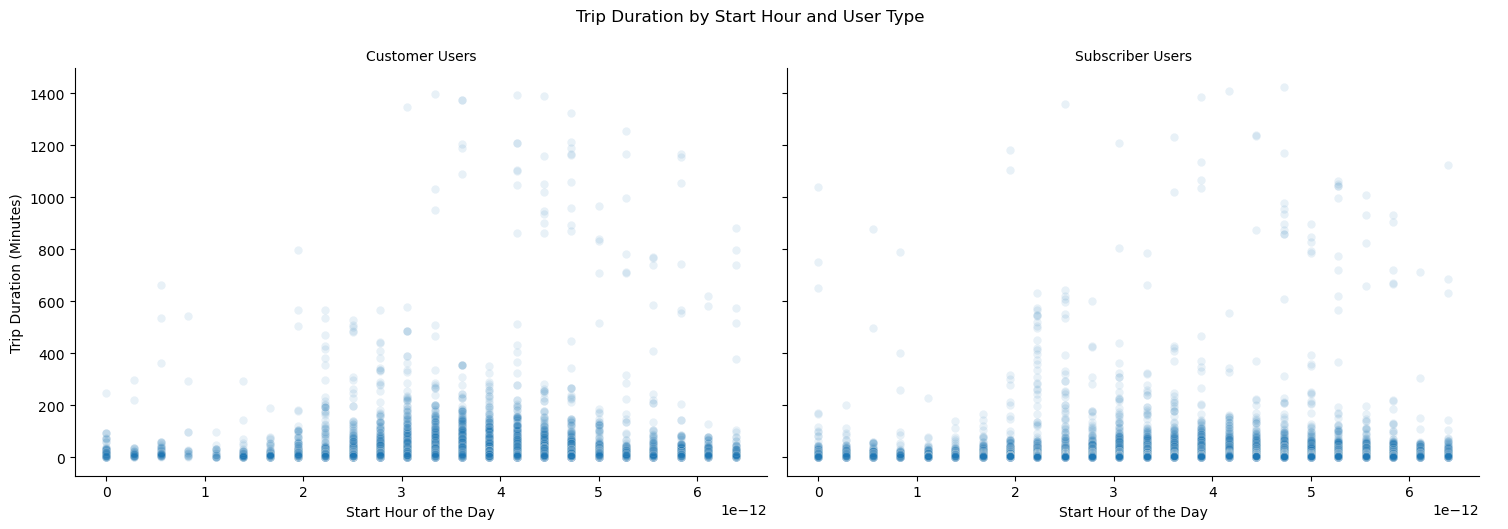

In [151]:
# Facet plot to show the relationship between trip duration, start hour, and user type
g = sns.FacetGrid(data=df1, col='user_type', height=5, aspect=1.5)
g.map(sns.scatterplot, 'start_hour', 'trip_duration_minutes', alpha=0.1)
g.add_legend()
g.set_axis_labels("Start Hour of the Day", "Trip Duration (Minutes)")
g.set_titles("{col_name} Users")
g.fig.suptitle("Trip Duration by Start Hour and User Type", y=1.05)
plt.show()


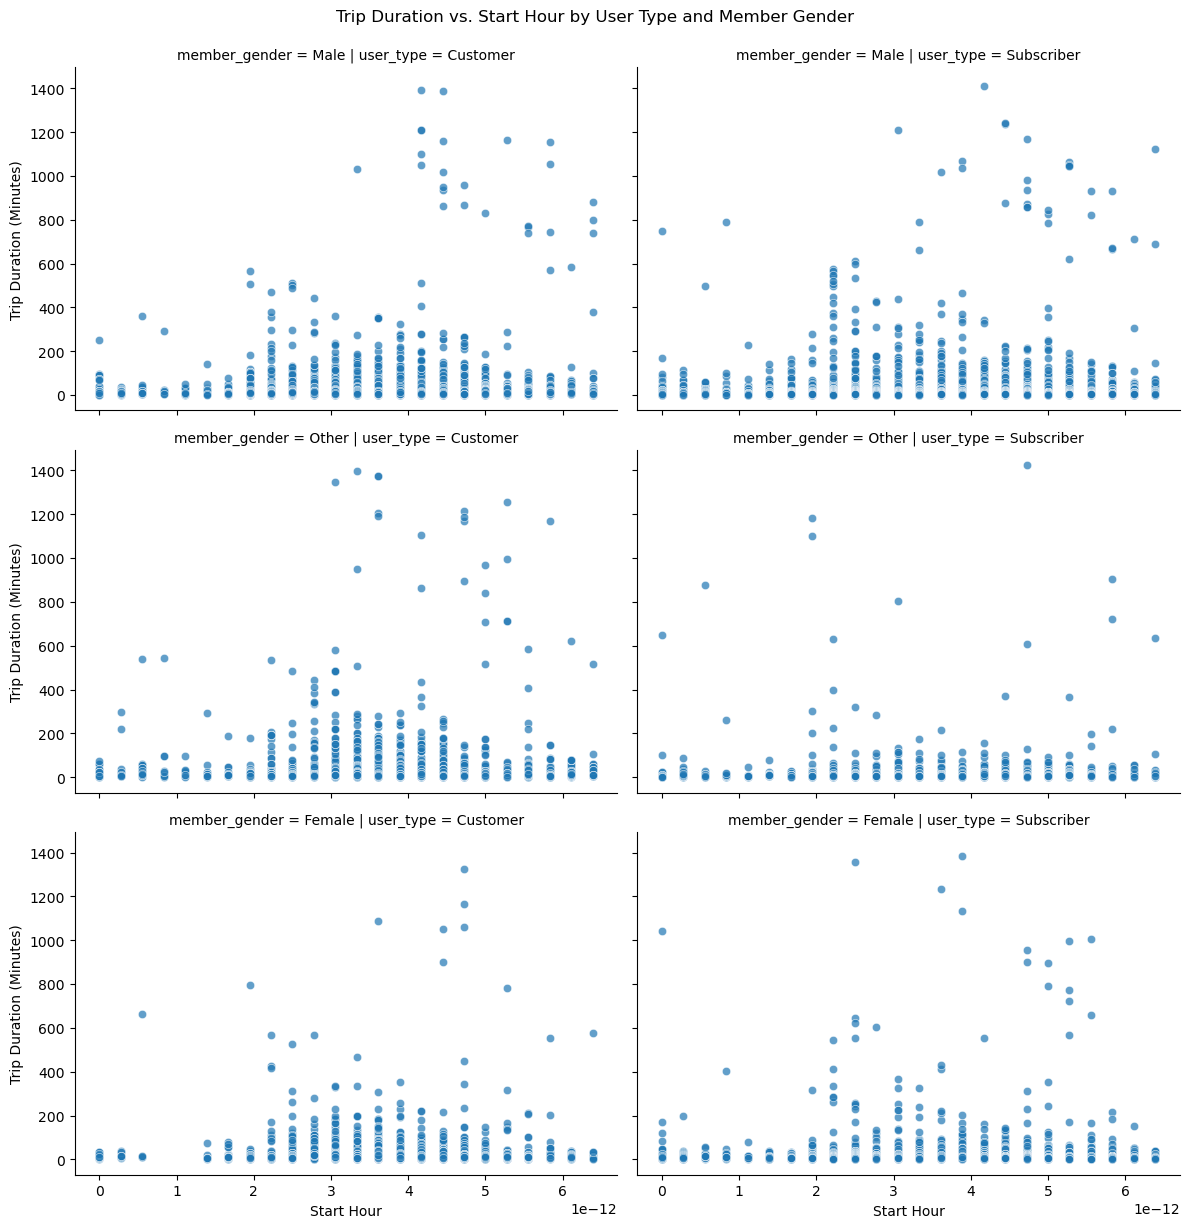

In [182]:
# Create a FacetGrid with user_type as the column facet and member_gender as the row facet
g = sns.FacetGrid(data=df1, col="user_type", row="member_gender", height=4, aspect=1.5)

# Map a scatter plot onto the FacetGrid
g.map(sns.scatterplot, "start_hour", "trip_duration_minutes", alpha=0.7)

# Add a title to the plot
g.fig.suptitle('Trip Duration vs. Start Hour by User Type and Member Gender', y=1.02)

# Adjust the axis labels
g.set_axis_labels("Start Hour", "Trip Duration (Minutes)")

# Show the plot
plt.show()

## Observations:

Subscribers: Most subscribers have shorter trip durations, especially during morning and evening rush hours, indicating that they mainly use the service for commuting.
Customers: Casual users (Customers) exhibit more variability in trip duration, with longer trips occurring at various times throughout the day. This suggests that casual users may use the service more for leisure than for commuting.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


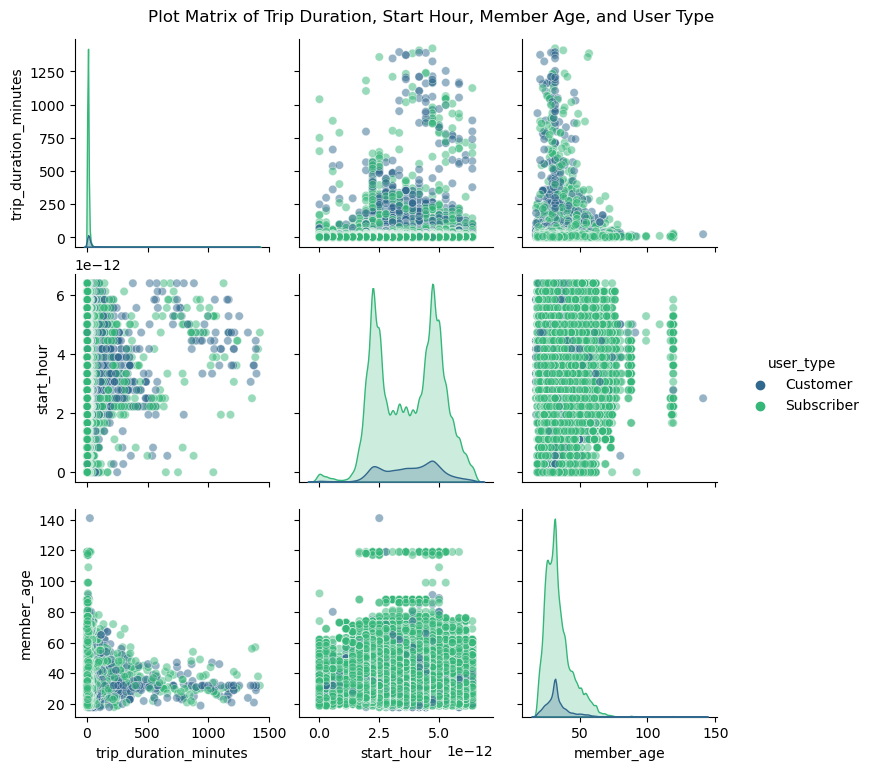

In [184]:
subset = df1[['trip_duration_minutes', 'start_hour', 'member_age', 'user_type']]

# Use pairplot to create a plot matrix
g = sns.pairplot(data=subset, hue="user_type", palette="viridis", diag_kind="kde", plot_kws={'alpha': 0.5})

# Add a title
g.fig.suptitle('Plot Matrix of Trip Duration, Start Hour, Member Age, and User Type', y=1.02)

# Show the plot
plt.show()

Trip Duration vs. Start Hour:

Subscribers: Likely show shorter trips concentrated during specific hours, especially around morning (e.g., 7-9 AM) and evening (e.g., 5-7 PM), consistent with commuting patterns.
Customers: Likely have more spread-out trip durations with no clear time concentration, indicating leisure use at varied hours.
Trip Duration vs. Member Age:

Subscribers: May have shorter trips across a wider age range, particularly clustered among middle-aged users, reflecting that subscribers might represent a working demographic.
Customers: Longer trip durations could be more common for younger or older users, suggesting that these casual users might take the bikes for recreational or exploratory trips.
Start Hour vs. Member Age:

The scatter plot here could show that both subscribers and customers are active across various age groups, but subscribers will have higher activity during commuting hours, while customers will have more spread-out activity times.
Diagonal KDE plots (Kernel Density Estimates):

For trip duration, subscribers likely show a peak at shorter trip lengths, while customers may have a broader distribution with longer trips.
For start hour, there will likely be twin peaks for subscribers (morning and evening rush hours), and a flatter distribution for customers, indicating more casual, all-day use.
For member age, both types of users might show that most users are middle-aged, though customers might have a more diverse age distribution.

2. Scatterplot with Multiple Encodings: Trip Duration, Start Hour, and Member Gender
Next, we'll explore the relationship between trip duration and start hour while incorporating gender as a third variable. This scatterplot will use different colors to represent different genders, allowing us to observe any gender-based patterns in trip duration and start times.

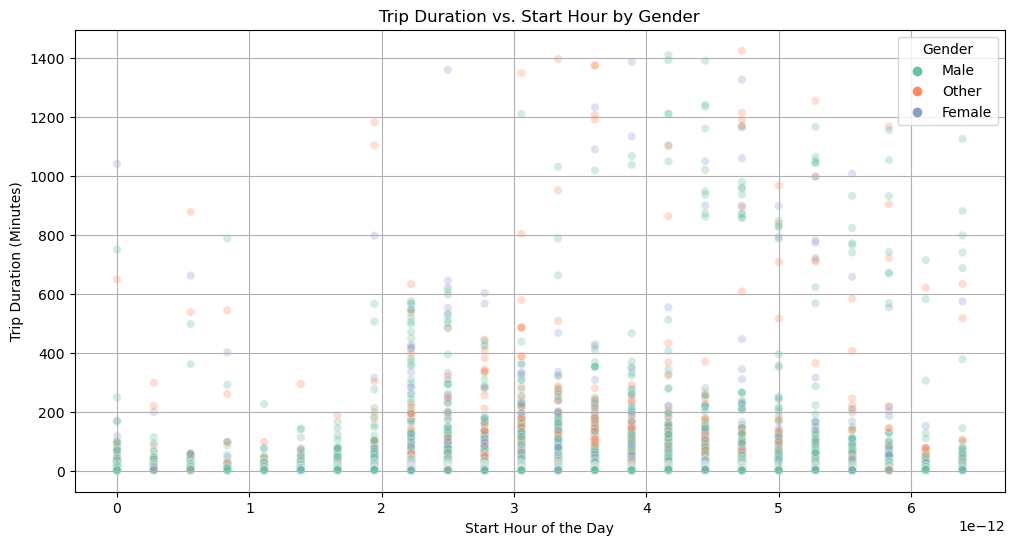

In [164]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='start_hour', y='trip_duration_minutes', hue='member_gender', alpha=0.3, palette='Set2')
plt.title('Trip Duration vs. Start Hour by Gender')
plt.xlabel('Start Hour of the Day')
plt.ylabel('Trip Duration (Minutes)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


Observations:

Gender Differences: Both male and female users show similar patterns, with the majority of trips occurring during typical commuting hours. There is no significant difference in trip duration between genders, suggesting that gender does not heavily influence how long users ride.


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Tip**: Create a list of summary findings to make it easy to review.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!



In this data exploration of the Ford GoBike System, several key insights were uncovered:

# Subscriber Behavior:

Most subscribers use the bike-sharing system for commuting purposes, as evidenced by the shorter trip durations during peak morning and evening rush hours.
# Customer Behavior:

Casual users, or customers, tend to take longer trips at varied times throughout the day, indicating that they may use the service more for leisure activities rather than commuting.
# Gender Influence:

There was no significant difference in trip durations between male and female users, with both genders showing similar usage patterns concentrated around commuting hours.
These findings highlight the differences between user types (subscribers vs. casual customers) and offer valuable insights for improving and tailoring the bike-sharing service to meet the needs of both commuter and leisure users